In [1]:
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [2]:
X_digits

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
len(X_digits)

1797

In [5]:
len(y_digits)

1797

In [14]:
#trifold
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    X_train = list(X_folds)
    print(type(X_train))
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    print(type(X_train))
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)
print(np.mean(scores))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]
0.943795214246


In [10]:
#basically concatenate make list into ndarray.

[array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   5., ...,  16.,  11.,   2.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  12.,   0.,   0.]]),
 array([[  0.,   0.,   1., ...,  16.,  16.,   8.],
        [  0.,   0.,  10., ...,  16.,  16.,   9.],
        [  0.,   0.,   6., ...,  16.,  15.,   3.],
        ..., 
        [  0.,   1.,  13., ...,   0.,   0.,   0.],
        [  0.,   1.,   7., ...,  12.,   2.,   0.],
        [  0.,   0.,  13., ...,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   7., ...,   8.,   0.,   0.],
        [  0.,   0.,  12., ...,   0.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]])]

cross-validation generator

In [15]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [16]:
kfold = KFold(n_splits=3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
         for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [27]:
k_fold = KFold(n_splits=4)
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=1)

array([ 0.95777778,  0.9376392 ,  0.97327394,  0.92873051])

In [29]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro')

array([ 0.95861876,  0.94257559,  0.97399291,  0.9289396 ])

In [31]:
#end of section exercise
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target


In [41]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
scores

[0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.15552937214547155,
 0.90260270247335728,
 0.9482070815179453,
 0.94490714734074643,
 0.94379972762867548,
 0.94379972762867548]

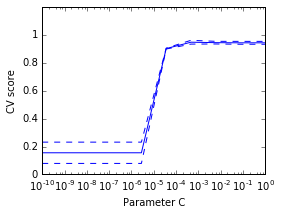

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.2)
plt.show()

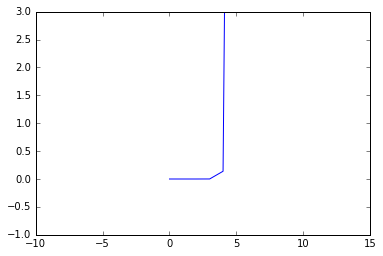

In [49]:
C_s = np.logspace(-10, 22, 15)
plt.plot(C_s)
plt.xlim(-10,15)
plt.ylim(-1,3)
plt.show()

grid search

In [50]:
#grid-search
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])        

clf.best_score_                                  

clf.best_estimator_.C                            


# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])      

0.94353826850690092

In [51]:
cross_val_score(clf, X_digits, y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])

In [52]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [53]:
lasso.alpha_ 

0.012291895087486173

In [56]:
lasso.cv

excersies

In [58]:
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

In [ ]:
lasso = Lasso(random_state=1)
